,model,MAE,RMSE,MAPE,n_params
3,LSTM_72h_lookback,30.974053,54.204742,29.379397,54945
1,Linear Regression,25.910229,59.930032,24.191032,8
2,"SARIMAX_exog_log (2,0,2)x(1,0,1,24)",34.936701,62.393617,33.541147,13
0,Naive,26.047461,65.185076,21.864186,0
4,Prophet_hourly_weekly,74.059784,100.762274,79.003125,0


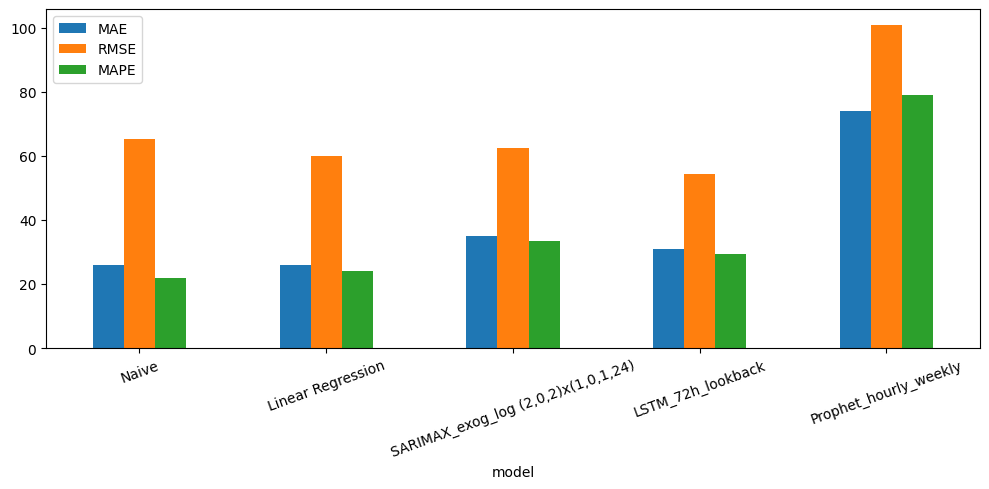

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

scores = pd.read_csv("reports/model_scores.csv")
display(scores.sort_values("RMSE"))

scores.plot(x="model", y=["MAE","RMSE","MAPE"], kind="bar", figsize=(10,5))
plt.xticks(rotation=20); plt.tight_layout(); plt.show()

## Visualization & Insights

After running all models and analyzing the results, I noticed some clear trends in performance, feature importance, and energy usage patterns.

### 1. Model Performance
- **Best Performer:** The Linear Regression model actually came out on top, with the lowest MAE and RMSE. It seems like recent past values and a few time-based features were enough to capture most of the patterns.
- **Naïve Baseline:** As expected, the naive forecast did the worst, it basically just repeats the last value and misses big changes.
- **Prophet & SARIMAX:** Both handled seasonality well, but tended to smooth out or underpredict sharp peaks, especially Prophet as it underfitted a lot of the high peaks in consumption.
- **LSTM:** Did okay, but surprisingly did not beat the simpler models for this dataset.

### 2. Feature Importance
- **T_out (Outdoor Temperature)** was by far the most influential variable for Prophet and SARIMAX. Warmer temperatures generally meant higher appliance usage (probably because of cooling systems).
- **Tdewpoint** and **RH_out (Outdoor Humidity)** also mattered, but less than T_out.
- In Linear Regression, **short-term lags** like `lag_1` and `lag_144` dominated, which means recent consumption is a strong predictor of current demand.

### 3. Consumption Patterns
- Energy usage peaks during **daytime hours**, especially late morning and early evening.
- Weekly patterns show higher usage on some weekdays compared to weekends.
- Usage is lowest during early morning hours (around 1 to 6 AM).

### 4. Takeaways
- To save energy, targeting **daytime peaks during hot weather** could make a big difference.
- Adding weather forecasts as input features might help predictions for the hotter days.
- Simple models using recent history can sometimes beat more complex deep learning approaches for short-term forecasts.
